## What helped Passengers survive?

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Image

D:\Program Files (x86)\Anaconda\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


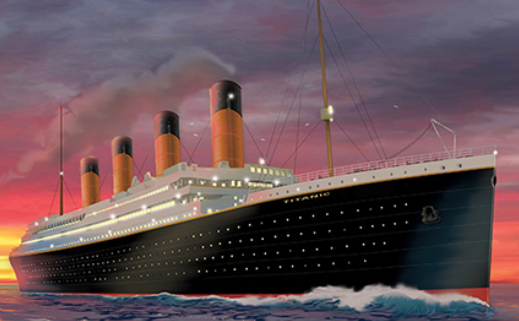

In [104]:
Image(filename='D:\\Python Projects\\Titanic\\titn.png') 

In [4]:
df=pd.read_csv('D:\\Python Projects\\Titanic\\train.csv') #Data Path

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
df["Sex"] = df["Sex"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 84.4+ KB


In [94]:
df.describe().ix[['std','min','max'],'Survived':]

,Survived,Pclass,Age,SibSp,Parch,Fare
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Distribution of Male and Female by Class

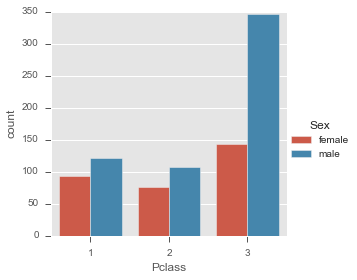

In [113]:
sns.factorplot(x='Pclass',data=df,hue='Sex', kind='count')

## Divide data into classes (Male,Female,Child) according to age

In [28]:
def male(passanger):
    age,sex=passanger
    if age<16:
        return 'child'
    else:
        return sex
# We'll define a new column called 'person',  axis=1 for columns and not index
df['person'] = df[['Age','Sex']].apply(male,axis=1)

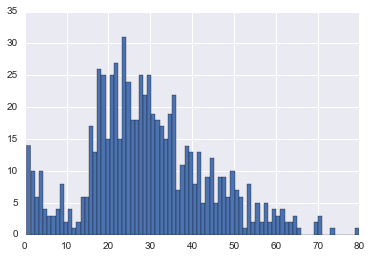

In [29]:
df['Age'].hist(bins=80)

In [132]:
print(df['person'].value_counts())
print(df['Pclass'].value_counts())

male      537
female    271
child      83
dtype: int64
3    491
1    216
2    184
dtype: int64


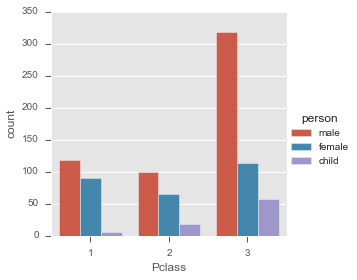

In [121]:
sns.factorplot(x='Pclass',data=df,hue='person', kind='count')

## Kernel Density Estimation (Male vs Female)

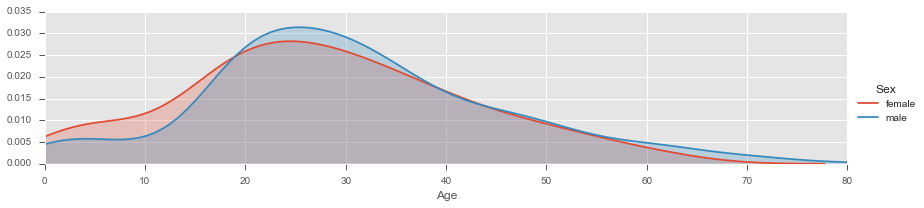

In [135]:
fig=sns.FacetGrid(df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
old=df['Age'].max()
fig.set(xlim=(0,old))
fig.add_legend()

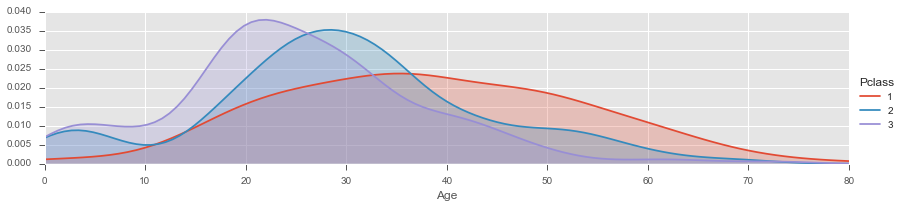

In [137]:
fig=sns.FacetGrid(df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
old=df['Age'].max()
fig.set(xlim=(0,old))
fig.add_legend()

In [13]:
df.sum().drop('PassengerId')#Summing columns excluding PassengerID

Survived      342.0000
Pclass       2057.0000
Age         21205.1700
SibSp         466.0000
Parch         340.0000
Fare        28693.9493
dtype: float64

In [14]:
df.dtypes #Data types of variables

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
qual=df.drop('Name',axis=1).ix[:,df.dtypes==object]
qual.head()

,Sex,Ticket,Cabin,Embarked
0,male,A/5 21171,NaN,S
1,female,PC 17599,C85,C
2,female,STON/O2. 3101282,NaN,S
3,female,113803,C123,S
4,male,373450,NaN,S


In [17]:
qual.describe()

,Sex,Ticket,Cabin,Embarked
count,891,891,204,889
unique,2,681,147,3
top,male,CA. 2343,C23 C25 C27,S
freq,577,7,4,644


In [18]:
print(qual.Sex.value_counts())
print(qual.Embarked.value_counts())

male      577
female    314
dtype: int64
S    644
C    168
Q     77
dtype: int64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [22]:
stats=df.describe()
print (np.all(stats.ix['count']==df.shape[0]))#Check if all values not null

False


## Descriptive Statistics

In [23]:
stats.ix[:,'Survived':]

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Correlation and Collinearity Test

In [24]:
df_numeric=df[['Survived','Pclass', 'Age', 'SibSp', 'Parch','Fare']]
df_numeric.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Collinearity Check

In [39]:
corr_threshold=0.50
col_with_corr=np.where(abs(df_numeric.corr())>corr_threshold)#Store corr above threshold
collinearity_index=np.where(col_with_corr[0]!=col_with_corr[1])#False Diagonals

x_cols=col_with_corr[0][collinearity_index]
y_cols=col_with_corr[1][collinearity_index]

In [40]:
if x_cols.any()and y_cols.any():
    print('There is a collinearity between:')
    print(x_cols,y_cols)
else:
    print('No collinearity between vars above %2f:'%corr_threshold)
#Detect collineaity above specified threshold

There is a collinearity between:
(array([1, 5], dtype=int64), array([5, 1], dtype=int64))


In [140]:
df.head()
deck=df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

## Port of Check In

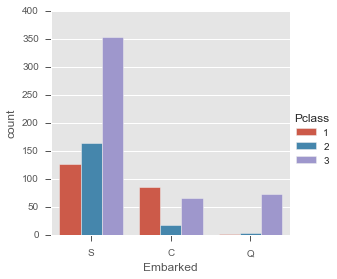

In [141]:
sns.factorplot(x='Embarked',data=df,hue='Pclass', kind='count')

In [6]:
df.head()
#Person is alone if both SibSp (sibling/spouse)& Parch (Parents/children) are zero

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [8]:
df['Alone']=df.SibSp+df.Parch
df['Alone'].loc[df['Alone']>0]='With Family'
df['Alone'].loc[df['Alone']==0]='Alone'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Alone


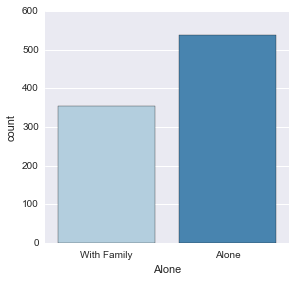

In [18]:
sns.factorplot('Alone',data=df,palette='Blues',kind='count')

## Who Survived

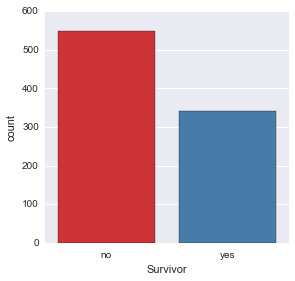

In [25]:
df['Survivor']=df.Survived.map({0:'no',1:'yes'})
sns.factorplot('Survivor',data=df,palette='Set1',kind='count')

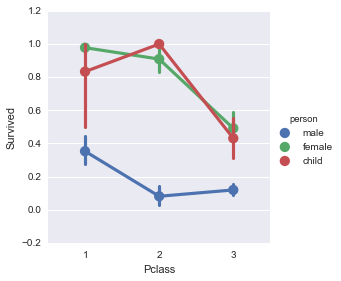

In [31]:
sns.factorplot('Pclass','Survived',hue='person',data=df)